# Removing Outliers from New York City Airbnb Open Dataset 

### Name: Tejas Yogesh Pawar
### PRN: 20190802021
**======================================================================**

#### Firstly we imported all the required libraries and New York City Airbnb Open Datadataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Here we get basic information about the dataset including data types, non null counts etc.

### Also, explored high level statistics of the datasets

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### lets look at how many missing values are in dataset

In [6]:

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### In describe method maximum of 'minimum_nights'is 1250 which I believe is unrealistic. so I found this column needs to remove outliers

In [8]:

df[df['minimum_nights'] > 365].count()

id                                14
name                              13
host_id                           14
host_name                         14
neighbourhood_group               14
neighbourhood                     14
latitude                          14
longitude                         14
room_type                         14
price                             14
minimum_nights                    14
number_of_reviews                 14
last_review                        6
reviews_per_month                  6
calculated_host_listings_count    14
availability_365                  14
dtype: int64

# Mean

In [9]:
df.mean()

id                                1.901714e+07
host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.527207e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.373221e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

# Median 

In [10]:
df.median()

id                                1.967728e+07
host_id                           3.079382e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
reviews_per_month                 7.200000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
dtype: float64

# Standard Deviation

In [11]:
df.std()

id                                1.098311e+07
host_id                           7.861097e+07
latitude                          5.453008e-02
longitude                         4.615674e-02
price                             2.401542e+02
minimum_nights                    2.051055e+01
number_of_reviews                 4.455058e+01
reviews_per_month                 1.680442e+00
calculated_host_listings_count    3.295252e+01
availability_365                  1.316223e+02
dtype: float64

# Removing outliers using standard deviation

In [12]:
df.minimum_nights.mean()

7.029962163820431

In [13]:
df.minimum_nights.std()

20.510549533180445

from above operations now we have required values to calculate upper and lower limit for "minimum_nights"

###  Upper limit

In [14]:
upper_limit = df.minimum_nights.mean() + 3*df.minimum_nights.std()
upper_limit

68.56161076336177

### Lower limit

In [15]:
lower_limit= df.minimum_nights.mean() - 3*df.minimum_nights.std()
lower_limit

-54.501686435720906

From above opertaions we have upper and lower limit so now can will calculate Outliers and remove outliers
## Outliers:

In [16]:
outliers= df[(df.minimum_nights > upper_limit) | (df.minimum_nights < lower_limit)]
outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,03-11-2018,0.12,1,180
106,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,28-06-2019,1.46,2,137
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,30-04-2019,0.90,1,140
349,94209,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,503800,Sadatu,Brooklyn,Crown Heights,40.67473,-73.94494,Entire home/apt,100,90,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365
48145,36108714,Williamsburg Waterfront Apartment,212865,Waad,Brooklyn,Williamsburg,40.72045,-73.96313,Entire home/apt,150,90,0,NaN,NaN,1,91
48205,36138789,Room with Amazing location in Manhattan,31846499,Veronika,Manhattan,East Harlem,40.78774,-73.94627,Private room,73,180,0,NaN,NaN,1,0
48312,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronx,Olinville,40.88116,-73.86547,Shared room,25,90,0,NaN,NaN,1,190


In [17]:
outliers.shape

(327, 16)

## Remove outliers

In [18]:
remove_outliers = df[(df.minimum_nights >  upper_limit) & (df.minimum_nights < lower_limit)]
remove_outliers.shape

(0, 16)

In [19]:
df[(df['minimum_nights'] < upper_limit )]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [20]:
df[(df['minimum_nights'] > lower_limit )]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Knowing & Analysing the data:

## 1. What is the distribution of the minimum number of nights for each airbnb listing?

In [21]:
nights = df[df.minimum_nights<=30]


NameError: name 'font' is not defined

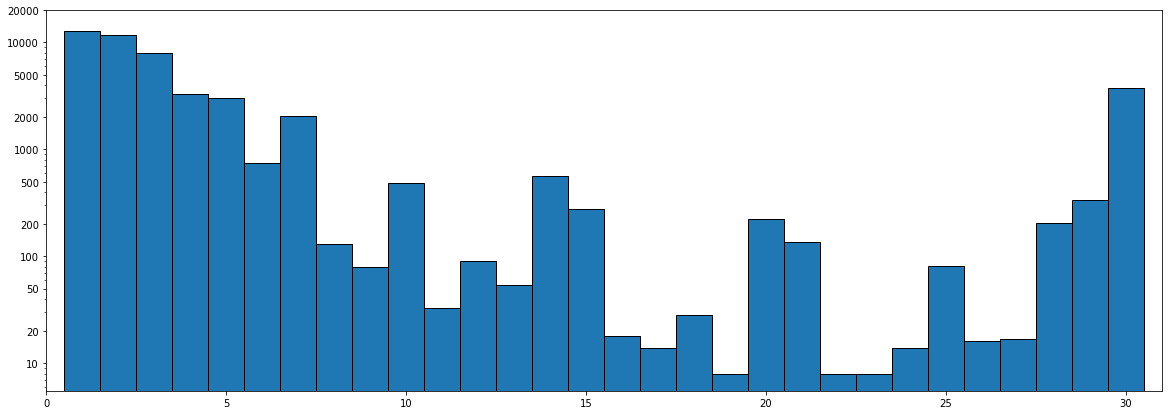

In [22]:
# set threshold for minimum number of nights
plt.figure(figsize=(20,7))

threshold = 30

# set bin size
bins = np.arange(0,threshold+1,1)
nights = df[df.minimum_nights<=threshold]

# plot graph
plt.hist(data=nights,x='minimum_nights',bins=bins+.5,ec='Black')
plt.yscale('log')
y_ticks = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
y_labels = ['{}'.format(v) for v in y_ticks]

plt.yticks(y_ticks,y_labels)
# add labels
plt.xlim(0,threshold+1)
plt.xlabel('Minimum number of nights', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
plt.title('Minimum number of nights', fontdict=font);

## 2. What is the distribution of airbnb listings by neighbourhood group?

In [23]:
# value counts on bars
def count(df,col):
    count = df[col].value_counts()
    for i in range (count.shape[0]):
        values = count[i]
        plt.text(i,values,values,ha='center',va='bottom',color='black',size=12)
    plt.yticks([])

In [24]:
def bar(df,col):
    #data setup
    freq = df[col].value_counts()
    order = freq.index
    
    plt.figure(figsize=(20,7))
    base_colour = sns.color_palette()[0]
    
    #plot graph
    sns.countplot(data=df,x=col,order=order,color=base_colour)
    
def labels(title_name, x, y):
    plt.title(title_name)
    plt.xlabel(x)
    plt.ylabel(y)

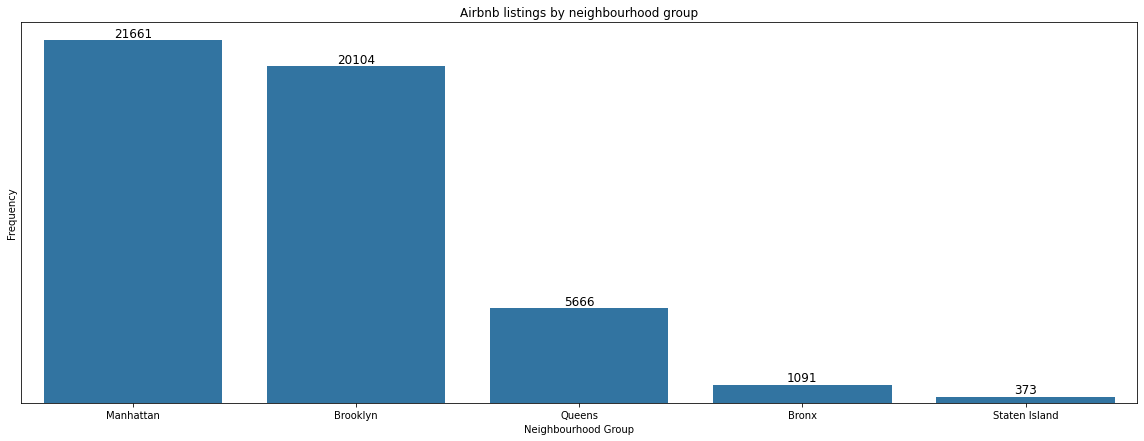

In [25]:
bar(df,'neighbourhood_group')
labels('Airbnb listings by neighbourhood group','Neighbourhood Group', 'Frequency')
count(df,'neighbourhood_group')

## 3. What is the distribution of the different room types?

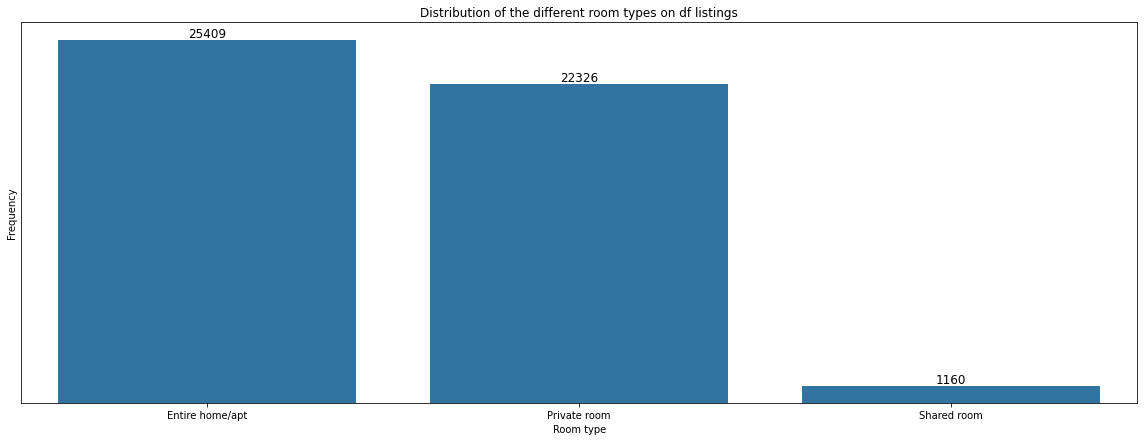

In [26]:
bar(df,'room_type')
labels('Distribution of the different room types on df listings','Room type','Frequency')
count(df,'room_type')

## 4. How the location affects the prices of different types of rooms?

In [27]:
#lets see prices of different type of rooms may affect by each neighbourhood_group
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [28]:
#Most Airbnb houses are in either Manhattan or Brooklyn. 
df_neighbourhood2=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(level=1)
df_neighbourhood2

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Price')

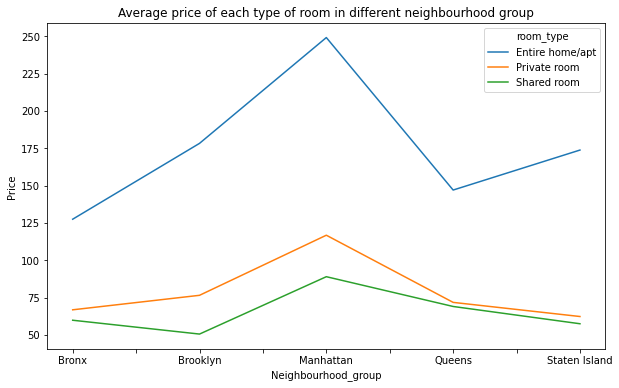

In [32]:
## Average price of each type of room in different neighbourhood group
df_neighbourhood2.plot(kind='line',figsize=(10,6))
plt.title("Average price of each type of room in different neighbourhood group") 
plt.xlabel("Neighbourhood_group")
plt.ylabel("Price")

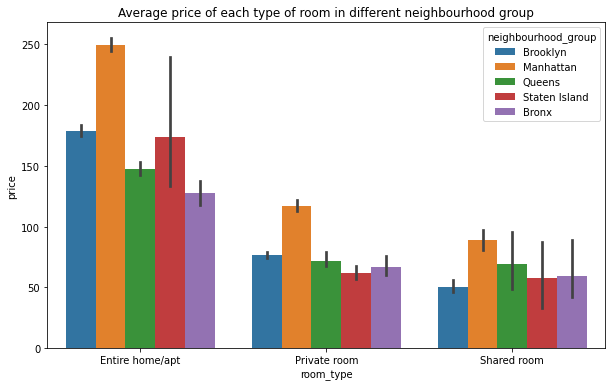

In [31]:
plt.figure(figsize=(10,6))
plt.title("Average price of each type of room in different neighbourhood group",) 
plt.xlabel('Room type')
plt.ylabel('Price')
sns.barplot(x='room_type',y='price',hue='neighbourhood_group',data=df,dodge=True,order=['Entire home/apt','Private room','Shared room']);

### Conclusion:
Here we successfully removed outliers using standard deviation and also explored the dataset.


 **=========================================================================================================**